In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import os
import pandas as pd
import seaborn as sns

In [13]:
def load_ppo_data(file_path,maxiter,spacing,dataname='Baseline'):
    fileslist  = os.listdir(file_path)
    rewards, steps, s_rate = None,None,None
    total_data=[]
    for i in range(5):
        for data in fileslist:
            if data.find('rewards')!=-1:
                rewards = np.load(file_path+'/' +data)[i]
            elif data.find('success')!=-1:
                s_rate = np.load(file_path+'/' +data)[i]
            elif data.find('steps')!=-1 :
                steps = np.load(file_path+'/' +data)[i]
        train_epoch = np.arange(0,maxiter+1,spacing)
        df = pd.DataFrame({'Rewards':rewards,'Success rate':s_rate,'Completion steps':steps,'Train epoch':train_epoch,'repeat':str(i),'schema':dataname})
        total_data.append(df)
    total_data = pd.concat(total_data,axis=0)
    return total_data

In [14]:
def load_base_data(file_path,maxiter,spacing):
    fileslist  = os.listdir(file_path)
    rewards, steps, s_rate = None,None,None
    total_data=[]
    for i in range(3):
        for data in fileslist:
            if data.find('rewards')!=-1:
                rewards = np.load(file_path+'/' +data)[i]
            elif data.find('steps')!=-1:
                steps = np.load(file_path+'/' +data)[i]
        train_epoch = np.arange(0,maxiter+1,spacing)
        s_rate = np.ones(train_epoch.shape[0])
        df = pd.DataFrame({'Rewards':rewards,'Success rate':s_rate,'Completion steps':steps,'Train epoch':train_epoch,'repeat':str(i),'schema':file_path})
        total_data.append(df)
    total_data = pd.concat(total_data,axis=0)
    return total_data

In [15]:
def load_ith_data(file_path,index,maxepoch,space,dataname):
    fileslist  = os.listdir(file_path)
    rewards, steps, s_rate = None,None,None
    for data in fileslist:
        if data.find('Rewards')!=-1 and data[-5]== str(index):
            rewards = np.load(file_path+'/' +data)[0:maxepoch+1]
        elif data.find('success')!=-1 and data[-5]== str(index):
            s_rate = np.load(file_path+'/' +data)[0:maxepoch+1]
        elif data.find('steps')!=-1 and data[-5]== str(index):
            steps = np.load(file_path+'/' +data)[0:maxepoch+1]
    train_epoch = np.arange(0,maxepoch+1,space)
    df = pd.DataFrame({'Rewards':rewards,'Success rate':s_rate,'Completion steps':steps,'Train epoch':train_epoch,'repeat':str(index),'schema':dataname})
    return df
def load_vdn_data(file_path,numtimes=5,maxepoch=100,space=5,dataname='VDN'):
    fileslist  = os.listdir(file_path)
    total_data = []
    for i in range(numtimes):
        df = load_ith_data(file_path,i,maxepoch,space,dataname)
        total_data.append(df)
    total_data = pd.concat(total_data,axis=0,ignore_index=True)
    return total_data

[(0.12156862745098039, 0.47058823529411764, 0.7058823529411765), (0.9882352941176471, 0.5529411764705883, 0.3843137254901961)]


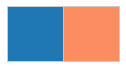

In [16]:
sns.set_theme(context='paper', style='whitegrid', font='Arial', font_scale=1.8)
# color = sns.color_palette('Paired',10)
color=[(0.12156862745098039, 0.47058823529411764, 0.7058823529411765),(0.9882352941176471, 0.5529411764705883, 0.3843137254901961)]
sns.palplot(color)
sns.set_palette(color)
print(color)

In [17]:
ppodata2d = load_ppo_data('PPO-2d',100,5)
vdndata2d = load_vdn_data('vdn-2d',maxepoch=100,space=5)

In [51]:
print(ppodata2d)

     Rewards  Success rate  Completion steps  Train epoch repeat    schema
0  -10.76025          0.07             86.47            0      0  Baseline
1   -4.80525          0.09             83.06            5      0  Baseline
2   -6.41825          0.15             74.78           10      0  Baseline
3   -3.58575          0.28             58.36           15      0  Baseline
4   -2.84025          0.31             54.22           20      0  Baseline
..       ...           ...               ...          ...    ...       ...
16  -0.00900          0.96             13.50           80      4  Baseline
17   0.51725          0.98             11.24           85      4  Baseline
18   0.24950          0.96             11.56           90      4  Baseline
19   0.55375          0.99             10.52           95      4  Baseline
20   0.58500          0.99              9.92          100      4  Baseline

[105 rows x 6 columns]


In [13]:
totaldata2d = pd.concat([vdndata2d,ppodata2d],axis=0,ignore_index=True)

In [9]:
print(totaldata2d)

      Rewards  Success rate  Completion steps  Train epoch repeat    schema
0   -10.76025          0.07             86.47            0      0  Baseline
1    -4.80525          0.09             83.06            5      0  Baseline
2    -6.41825          0.15             74.78           10      0  Baseline
3    -3.58575          0.28             58.36           15      0  Baseline
4    -2.84025          0.31             54.22           20      0  Baseline
..        ...           ...               ...          ...    ...       ...
205   4.46850          1.00             12.02           80      4       VDN
206   4.40750          0.99             12.84           85      4       VDN
207   4.33675          0.98             13.06           90      4       VDN
208   4.34700          0.99             13.87           95      4       VDN
209   4.43500          0.99             12.02          100      4       VDN

[210 rows x 6 columns]


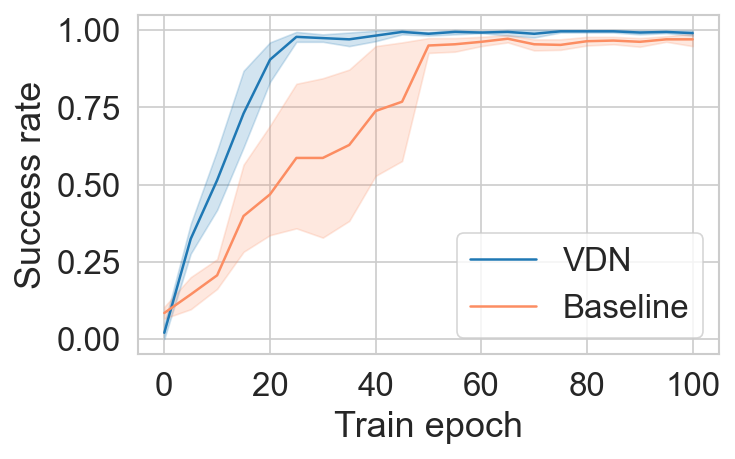

In [14]:
fig1, ax1 = plt.subplots(figsize=(5,3), dpi=150)
ax1 =sns.lineplot(x='Train epoch',y='Success rate',hue='schema',data=totaldata2d)
ax = plt.gca()
ax.set_xticks(range(0,101,20))
h,l = ax.get_legend_handles_labels()
ax.legend(handles=h,labels=l)

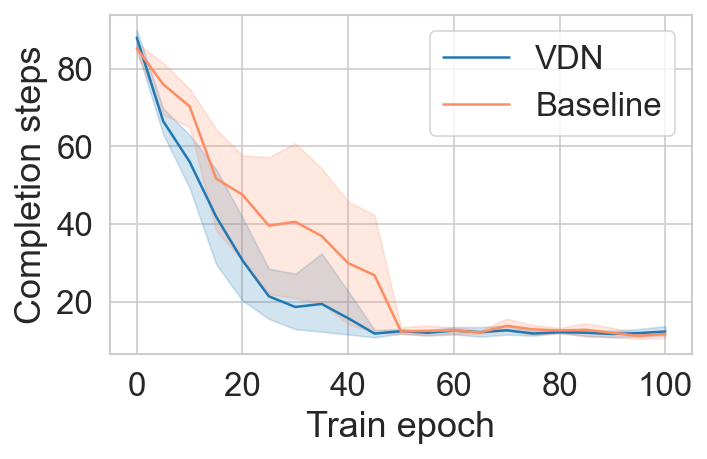

In [15]:
fig1, ax1 = plt.subplots(figsize=(5,3), dpi=150)
ax1 =sns.lineplot(x='Train epoch',y='Completion steps',hue='schema',data=totaldata2d)
ax = plt.gca()
ax.set_xticks(range(0,101,20))
h,l = ax.get_legend_handles_labels()
ax.legend(handles=h,labels=l)

In [8]:
vdndata3d = load_vdn_data('vdn-3d',maxepoch=200,space=5)
ppodata3d = load_ppo_data('PPO-3d',200,5)
totaldata3d = pd.concat([vdndata3d,ppodata3d],axis=0,ignore_index=True)

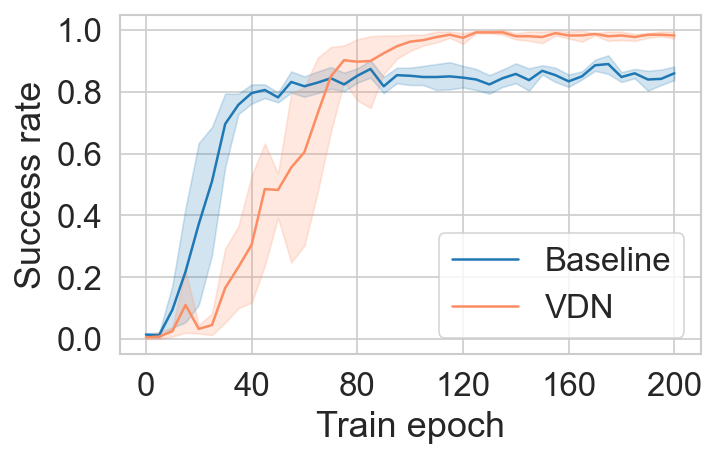

In [9]:
fig2, ax2 = plt.subplots(figsize=(5,3), dpi=150)
ax2 =sns.lineplot(x='Train epoch',y='Success rate',hue='schema',data=totaldata3d)
ax = plt.gca()
ax.set_xticks(range(0,201,40))
ax.set_yticks(np.arange(0,1.1,step=0.2))
ax.invert_yaxis()
ax.set_xticks(range(0,201,40))
h,l = ax.get_legend_handles_labels()
ax.legend(handles=h,labels=l)

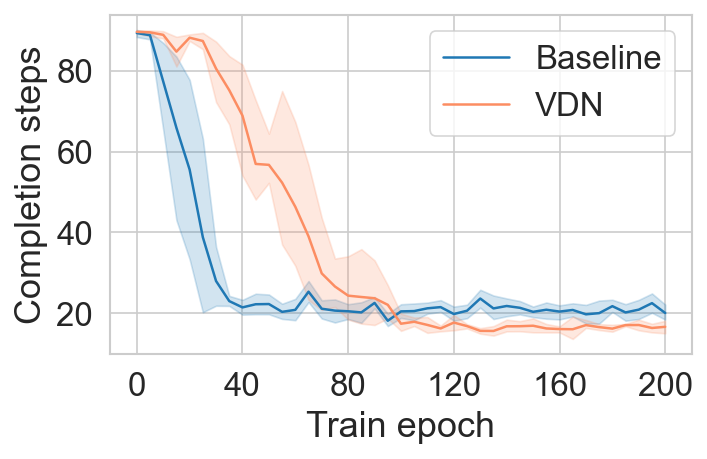

In [10]:
fig1, ax1 = plt.subplots(figsize=(5,3), dpi=150)
ax1 =sns.lineplot(x='Train epoch',y='Completion steps',hue='schema',data=totaldata3d)
ax = plt.gca()
ax.set_xticks(range(0,201,40))
ax.invert_yaxis()
h,l = ax.get_legend_handles_labels()
ax.legend(handles=h,labels=l)

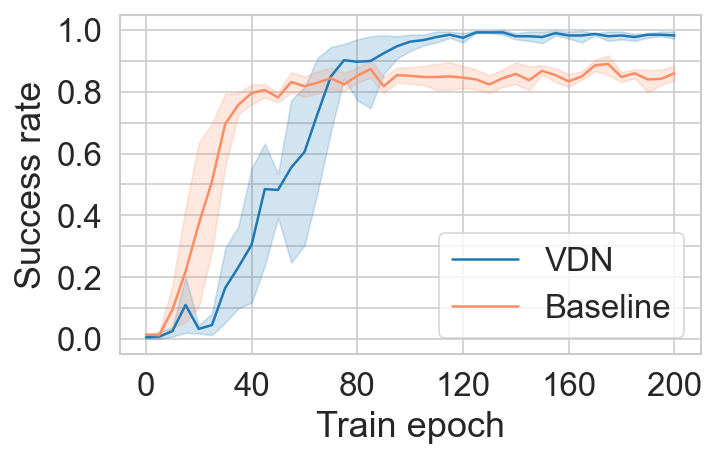

In [43]:
fig2, ax2 = plt.subplots(figsize=(5,3), dpi=150)
ax = plt.gca()
ymajorLocator = MultipleLocator(0.2)  # 将y轴主刻度标签设置为0.5的倍数
ymajorFormatter = FormatStrFormatter('%1.1f')  # 设置y轴标签文本的格式
yminorLocator = MultipleLocator(0.1)  # 将此y轴次刻度标签设置为0.1的倍数
ax.yaxis.set_major_locator(ymajorLocator)
ax.yaxis.set_major_formatter(ymajorFormatter)
ax.yaxis.set_minor_locator(yminorLocator)
ax.set_xticks(range(0,201,40))
ax2 =sns.lineplot(x='Train epoch',y='Success rate',hue='schema',data=totaldata3d)
ax.invert_yaxis()
h,l = ax.get_legend_handles_labels()
ax.legend(handles=h,labels=l)
ax.yaxis.grid(True, which='minor') 

In [8]:
def load_ppo2_data(file_path,maxiter,spacing,dataname='Baseline'):
    fileslist  = os.listdir(file_path)
    rewards, steps, s_rate = None,None,None
    total_data=[]
    for i in range(4):
        for data in fileslist:
            if data.find('rewards')!=-1:
                rewards = np.load(file_path+'/' +data)[i][0:maxiter//5+1]
            elif data.find('success')!=-1:
                s_rate = np.load(file_path+'/' +data)[i][0:maxiter//5+1]
            elif data.find('steps')!=-1 :
                steps = np.load(file_path+'/' +data)[i][0:maxiter//5+1]
        train_epoch = np.arange(0,maxiter+1,spacing)
        df = pd.DataFrame({'Rewards':rewards,'Success rate':s_rate,'Completion steps':steps,'Train epoch':train_epoch,'repeat':str(i),'schema':dataname})
        total_data.append(df)
    total_data = pd.concat(total_data,axis=0)
    return total_data

In [24]:
vdndata4d = load_vdn_data('vdn-4d',numtimes=4,maxepoch=200,space=5)
ppodata4d = load_ppo2_data('PPO-4d',200,5)
totaldata4d = pd.concat([vdndata4d,ppodata4d],axis=0,ignore_index=True)

In [25]:
vdndata4d.shape

(164, 6)

In [26]:
ppodata4d.shape

(164, 6)

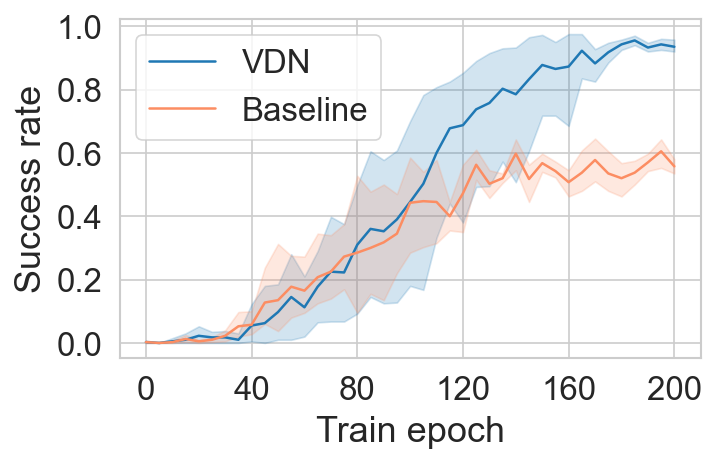

In [28]:
fig2, ax2 = plt.subplots(figsize=(5,3), dpi=150)
ax2 =sns.lineplot(x='Train epoch',y='Success rate',hue='schema',data=totaldata4d)
ax = plt.gca()
ax.set_xticks(range(0,201,40))
ax.set_yticks(np.arange(0,1.1,step=0.2))
# ax.invert_yaxis()
ax.set_xticks(range(0,201,40))
h,l = ax.get_legend_handles_labels()
ax.legend(handles=h,labels=l)

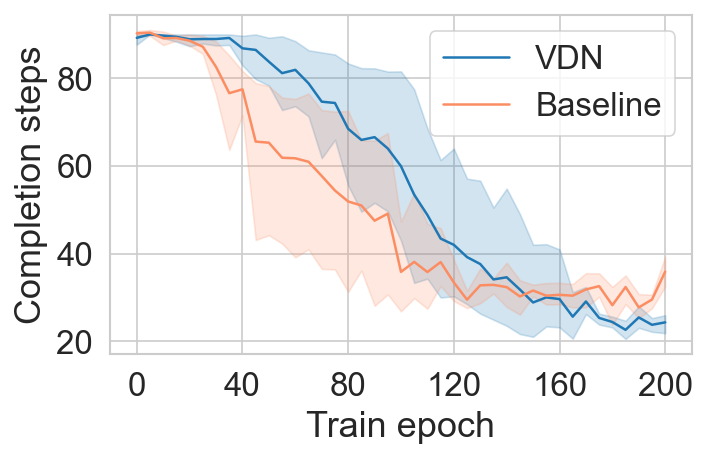

In [30]:
fig1, ax1 = plt.subplots(figsize=(5,3), dpi=150)
ax1 =sns.lineplot(x='Train epoch',y='Completion steps',hue='schema',data=totaldata4d)
ax = plt.gca()
ax.set_xticks(range(0,201,40))
# ax.invert_yaxis()
h,l = ax.get_legend_handles_labels()
ax.legend(handles=h,labels=l)